# Jonathan Tahod 

## Question1: Handwriting Recognition using Machine Learning! 
## a- Check the dataset “Digit” in HW5 package. It includes 1700 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits! 
## Import the following two libraries to work with images:
##  import matplotlib.image as mpimg import matplotlib.pyplot as plt
## you can use:
mpimg.imread(file_name) to load an image, and
plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest') to show an image.
Add %matplotlib inline at top of your code to make sure that the images will be shown inside the Jupyter explorer page.



In [116]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score




%matplotlib inline
# load image
# for testing
img = mpimg.imread('Digit/0.jpg')

# print(img)

# plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

data = []
for i in range(1700):
    img = mpimg.imread('Digit/'+str(i)+'.jpg')
#     reshape matrix for part B
    feature = img.reshape(-1)                #  (64,)
    data.append(feature)
#     plt.imshow(img, cmap="Greys")
#     plt.show()
# print (data[0:10])

##  b- Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns. (done in part A in for loop )

In [117]:
X = np.array(data)

y = pd.read_csv('label.csv')
y = y['digit label']
print (y.shape)
print(X.shape)


(1700,)
(1700, 64)


##  c- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=3.

In [118]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    random_state=3)

print(y_test.shape)
print(X_test.shape)

(170,)
(170, 64)


## d - Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:    Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.



In [119]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

## e- Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:          
## plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')


[7 7 9 8 8 2 2 8 9 6 7 6 4 6 3 9 3 1 5 8 6 4 2 4 3 4 1 6 6 0 1 6 2 1 2 4 4
 9 4 2 7 7 0 4 1 1 9 0 6 8 4 5 1 7 3 3 0 7 2 7 1 3 4 5 7 6 3 3 8 7 0 6 2 7
 9 4 3 9 3 8 4 7 1 6 1 5 1 0 5 0 1 2 6 0 7 0 6 8 1 2 5 0 7 6 8 0 6 7 0 9 8
 8 1 5 5 1 2 8 7 4 3 8 3 9 5 9 3 3 5 3 3 6 3 7 8 7 3 6 8 8 7 8 5 6 1 1 3 1
 8 3 7 3 0 5 5 1 4 2 1 6 5 1 1 9 2 8 5 1 9 1]
0.9588235294117647
test:  7
prediction:  1


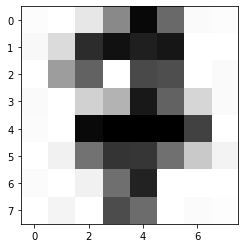

test:  8
prediction:  1


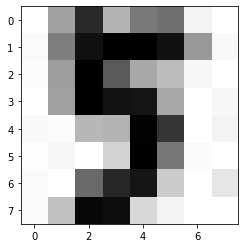

test:  4
prediction:  7


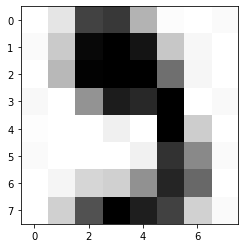

test:  4
prediction:  9


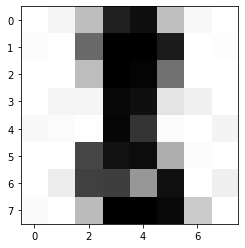

test:  3
prediction:  5


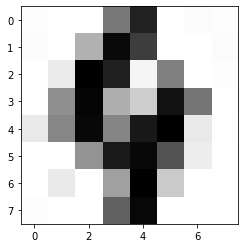

test:  9
prediction:  7


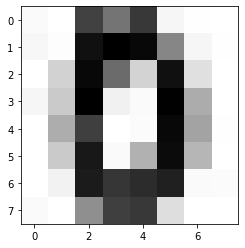

test:  3
prediction:  8


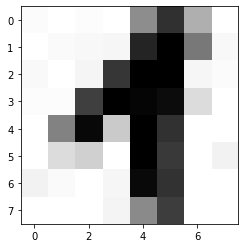

In [120]:
#part e
test = y_test.ravel()
prediction = my_RandomForest.predict(X_test)
print(prediction)

score_rf = accuracy_score(test, prediction)

print(score_rf)


for i in range(170):
    if(test[i] != prediction[i]):
        print("test: ",test[i])
        print("prediction: ",prediction[i])
        plt.imshow(mpimg.imread('Digit/'+str(i)+'.jpg'), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.pause(.1)


        

